In [64]:
import pandas as pd
import numpy as np
import mysql.connector as mysql
from mysql.connector import Error

In [17]:
try:
    conn = mysql.connect(host='127.0.0.1', user='root',  
                        password='root', buffered=True)#give ur username, password
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("USE MIGRATION")
except Error as e:
    print("Error while connecting to MySQL", e)

### Number of employees hired for each job and department in 2021 divided by quarter. The table must be ordered alphabetically by department and job.

`select 
D.department, 
J.job,
sum(case when Quarter='Q1' then count else 0 end) as Q1,
sum(case when Quarter='Q2' then count else 0 end) as Q2,
sum(case when Quarter='Q3' then count else 0 end) as Q3,
sum(case when Quarter='Q4' then count else 0 end) as Q4
from (
select department_id, job_id, concat('Q',quarter(datetime) ) as Quarter, count(*) as count
from hired_employees 
where datetime = 2021 
group by  department_id, job_id, quarter(datetime) 
) A
inner join jobs J
on J.id = A.job_id
inner join departments D
on D.id = A.department_id
group by D.department, J.job
order by D.department asc, J.job asc`

In [63]:
Query1 = ("select "
            "D.department," 
            "J.job,"
            "sum(case when Quarter='Q1' then count else 0 end) as Q1,"
            "sum(case when Quarter='Q2' then count else 0 end) as Q2,"
            "sum(case when Quarter='Q3' then count else 0 end) as Q3,"
            "sum(case when Quarter='Q4' then count else 0 end) as Q4 "
            "from ("
            "select department_id, job_id, concat('Q',quarter(datetime) ) as Quarter, count(*) as count "
            "from hired_employees "
            "where datetime = 2021 " 
            "group by  department_id, job_id, quarter(datetime) " 
            ") A "
            "inner join jobs J "
            "on J.id = A.job_id "
            "inner join departments D "
            "on D.id = A.department_id "
            "group by D.department, J.job "
            "order by D.department asc, J.job asc ")

df1 = pd.read_sql(Query1, conn)
display(df1)


,department,job,Q1,Q2,Q3,Q4
0,Accounting,Account Representative IV,1.0,0.0,0.0,0.0
1,Accounting,Actuary,0.0,1.0,0.0,0.0
2,Accounting,Analyst Programmer,0.0,0.0,1.0,0.0
3,Accounting,Budget/Accounting Analyst III,0.0,1.0,0.0,0.0
4,Accounting,Cost Accountant,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
933,Training,Teacher,0.0,2.0,0.0,0.0
934,Training,Technical Writer,0.0,0.0,1.0,0.0
935,Training,VP Product Management,1.0,0.0,0.0,0.0
936,Training,VP Quality Control,0.0,1.0,0.0,0.0


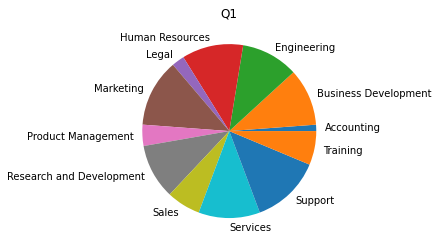

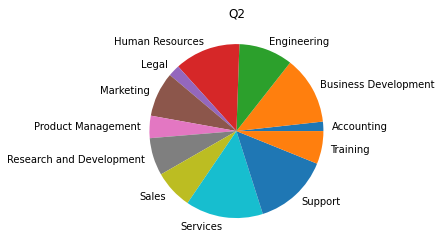

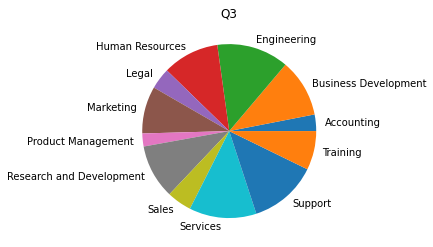

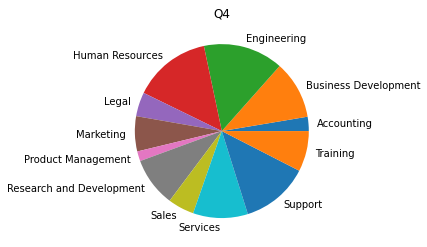

In [73]:
pieQ1 = df1.groupby(['department']).sum().plot(kind='pie', y='Q1',title='Q1',legend = False, ylabel = "")
pieQ2 = df1.groupby(['department']).sum().plot(kind='pie', y='Q2',title='Q2',legend = False, ylabel = "")
pieQ3 = df1.groupby(['department']).sum().plot(kind='pie', y='Q3',title='Q3',legend = False, ylabel = "")
pieQ4 = df1.groupby(['department']).sum().plot(kind='pie', y='Q4',title='Q4',legend = False, ylabel = "")

### List of ids, name and number of employees hired of each department that hired more employees than the mean of employees hired in 2021 for all the departments, ordered by the number of employees hired (descending)

`select H.department_id as ID, D.department as DEPARTMENT, count(*) as HIRED
from hired_employees H
inner join departments D
on D.id = H.department_id
group by H.department_id , D.department
having HIRED > (
select avg(count) as avg from (
select department_id,  count(*) as count
from hired_employees 
where datetime = 2021 
group by department_id) L ) 
order by HIRED desc`

In [44]:
Query2 = ("select H.department_id as ID, D.department as DEPARTMENT, count(*) as HIRED"
          "  from hired_employees H"
          "  inner join departments D"
          "  on D.id = H.department_id"
          "  group by H.department_id , D.department"
          "  having HIRED > ("
          "  select avg(count) as avg from ("
          "  select department_id,  count(*) as count"
          "  from hired_employees "
          "  where datetime = 2021 "
          "  group by department_id) L ) "
          "  order by HIRED desc ")

df2 = pd.read_sql(Query2, conn)
display(df2)

,ID,DEPARTMENT,HIRED
0,8,Support,256
1,6,Human Resources,249
2,5,Engineering,245
3,7,Services,240
4,4,Business Development,222
5,3,Research and Development,178
6,9,Marketing,166
7,10,Training,141


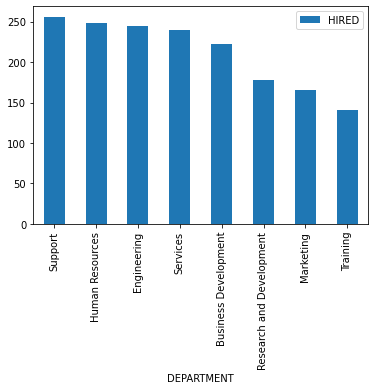

In [46]:
ax = df2.plot.bar(x='DEPARTMENT', y='HIRED')